<a href="https://colab.research.google.com/github/Jayflo44/Oil_DevApp/blob/main/Oil_App_UML_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install graphviz
!apt-get install -y graphviz
!pip install graphviz

# Step 2: Import necessary libraries
from graphviz import Digraph
from IPython.display import Image



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


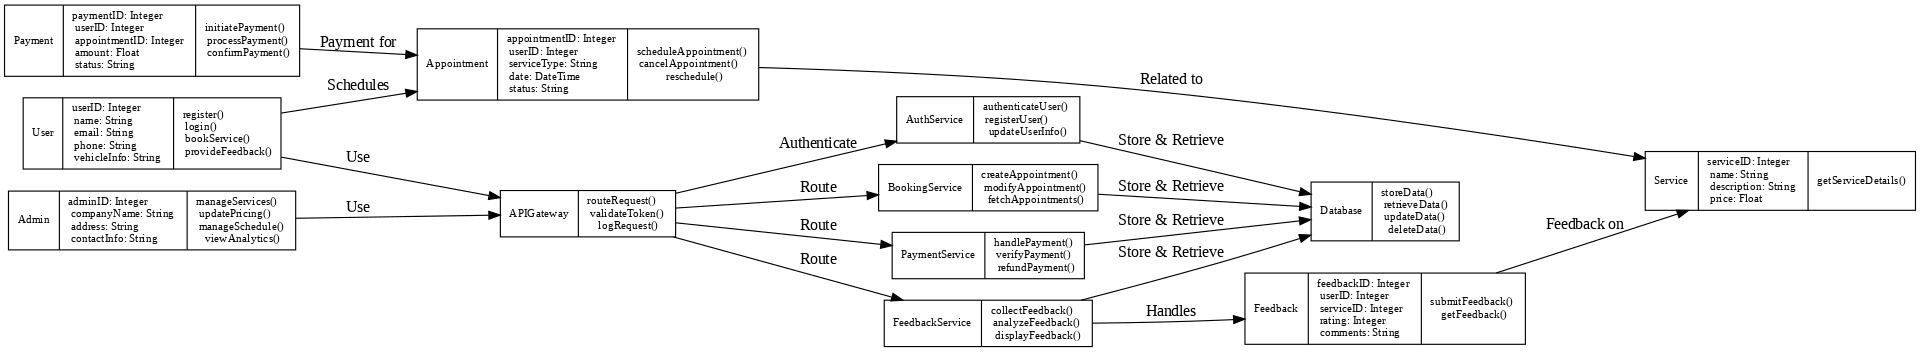

In [ ]:
# Re-importing necessary modules and re-creating the UML diagram after environment reset

from graphviz import Digraph

# Create a new directed graph
uml_diagram = Digraph('OilChangeApp_UML', format='png')
uml_diagram.attr(rankdir='LR', size='20')

# Define node styles
uml_diagram.attr('node', shape='record', fontsize='10')

# User Nodes
uml_diagram.node('User', '{User | userID: Integer \l name: String \l email: String \l phone: String \l vehicleInfo: String \l | register() \l login() \l bookService() \l provideFeedback() }')

# Admin/Company Nodes
uml_diagram.node('Admin', '{Admin | adminID: Integer \l companyName: String \l address: String \l contactInfo: String \l | manageServices() \l updatePricing() \l manageSchedule() \l viewAnalytics() }')

# Appointment Node
uml_diagram.node('Appointment', '{Appointment | appointmentID: Integer \l userID: Integer \l serviceType: String \l date: DateTime \l status: String \l | scheduleAppointment() \l cancelAppointment() \l reschedule() }')

# Service Node
uml_diagram.node('Service', '{Service | serviceID: Integer \l name: String \l description: String \l price: Float \l | getServiceDetails() }')

# Payment Node
uml_diagram.node('Payment', '{Payment | paymentID: Integer \l userID: Integer \l appointmentID: Integer \l amount: Float \l status: String \l | initiatePayment() \l processPayment() \l confirmPayment() }')

# Feedback Node
uml_diagram.node('Feedback', '{Feedback | feedbackID: Integer \l userID: Integer \l serviceID: Integer \l rating: Integer \l comments: String \l | submitFeedback() \l getFeedback() }')

# API Gateway Node
uml_diagram.node('APIGateway', '{APIGateway | routeRequest() \l validateToken() \l logRequest() }')

# Microservices Nodes
uml_diagram.node('AuthService', '{AuthService | authenticateUser() \l registerUser() \l updateUserInfo() }')
uml_diagram.node('BookingService', '{BookingService | createAppointment() \l modifyAppointment() \l fetchAppointments() }')
uml_diagram.node('PaymentService', '{PaymentService | handlePayment() \l verifyPayment() \l refundPayment() }')
uml_diagram.node('FeedbackService', '{FeedbackService | collectFeedback() \l analyzeFeedback() \l displayFeedback() }')

# Database Node
uml_diagram.node('Database', '{Database | storeData() \l retrieveData() \l updateData() \l deleteData() }')

# Relationships
uml_diagram.edge('User', 'APIGateway', label='Use')
uml_diagram.edge('Admin', 'APIGateway', label='Use')
uml_diagram.edge('APIGateway', 'AuthService', label='Authenticate')
uml_diagram.edge('APIGateway', 'BookingService', label='Route')
uml_diagram.edge('APIGateway', 'PaymentService', label='Route')
uml_diagram.edge('APIGateway', 'FeedbackService', label='Route')
uml_diagram.edge('BookingService', 'Database', label='Store & Retrieve')
uml_diagram.edge('PaymentService', 'Database', label='Store & Retrieve')
uml_diagram.edge('AuthService', 'Database', label='Store & Retrieve')
uml_diagram.edge('FeedbackService', 'Database', label='Store & Retrieve')
uml_diagram.edge('User', 'Appointment', label='Schedules')
uml_diagram.edge('Appointment', 'Service', label='Related to')
uml_diagram.edge('Payment', 'Appointment', label='Payment for')
uml_diagram.edge('Feedback', 'Service', label='Feedback on')
uml_diagram.edge('FeedbackService', 'Feedback', label='Handles')

uml_diagram.render('OilChangeApp_UML')  # This saves the file as 'OilChangeApp_UML.png'
Image('OilChangeApp_UML.png')  # Display the image in the notebook
